# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [29]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

url = "https://ycharts.com/companies/TSLA/revenues"

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    with open("revenues.html", "wb") as dataset:
      dataset.write(response.content) 
    print("HTML content downloaded successfully.")
else:
    print(f"Request failed with status code: {response.status_code}")

#Asi lo guardamos.
with open("revenues.html", "r", encoding ="utf-8") as file: # 'utf-8' is common but may need adjustment
  html_content = file.read()
soup = BeautifulSoup(html_content, "html.parser")

#Asi lo levantamos
tables = soup.find_all("table")
tables

# Extraer las dos primeras tablas 
table0 = tables[0]  
table1 = tables[1]

# Extrae los encabezados (headers) de la tabla
headers = []
for th in table0.find_all("th"):
    headers.append(th.text.strip())  # 'strip()' limpia espacios en blanco

# Extrae las filas de datos
data = []
for row in table0.find_all("tr")[1:]:  # Ignora el primer tr si es el header
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)
for row in table1.find_all("tr")[1:]:  # Ignora el primer tr si es el header
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)


# Crea un DataFrame a partir de los datos y encabezados
df = pd.DataFrame(data, columns=headers)



# Definimos una función para convertir a numérico
def convert_to_numeric(value):
    # Si el valor contiene 'B', multiplicamos por mil millones (billones)
    if 'B' in value:
        return float(value.replace('B', '').replace(',', '').strip()) * 1e9
    # Si el valor contiene 'M', multiplicamos por un millón
    elif 'M' in value:
        return float(value.replace('M', '').replace(',', '').strip()) * 1e6
    else:
        # En caso de que ya sea un valor numérico sin letras
        return float(value.replace(',', '').strip())

# Aplicamos la función a la columna 'value' (ajusta el nombre si es diferente)
df['Value'] = df['Value'].apply(convert_to_numeric)

df["Date"] = pd.to_datetime(df["Date"])
df["Date"] = df["Date"].dt.strftime('%m-%y')

df_invertido = df.iloc[::-1].reset_index(drop=True)
df_invertido

HTML content downloaded successfully.


,Date,Value
0,06-12,2.665000e+07
1,09-12,5.010000e+07
2,12-12,3.063300e+08
3,03-13,5.617900e+08
4,06-13,4.051400e+08
5,09-13,4.313500e+08
6,12-13,6.152200e+08
7,03-14,6.205400e+08
8,06-14,7.693500e+08
9,09-14,8.518000e+08


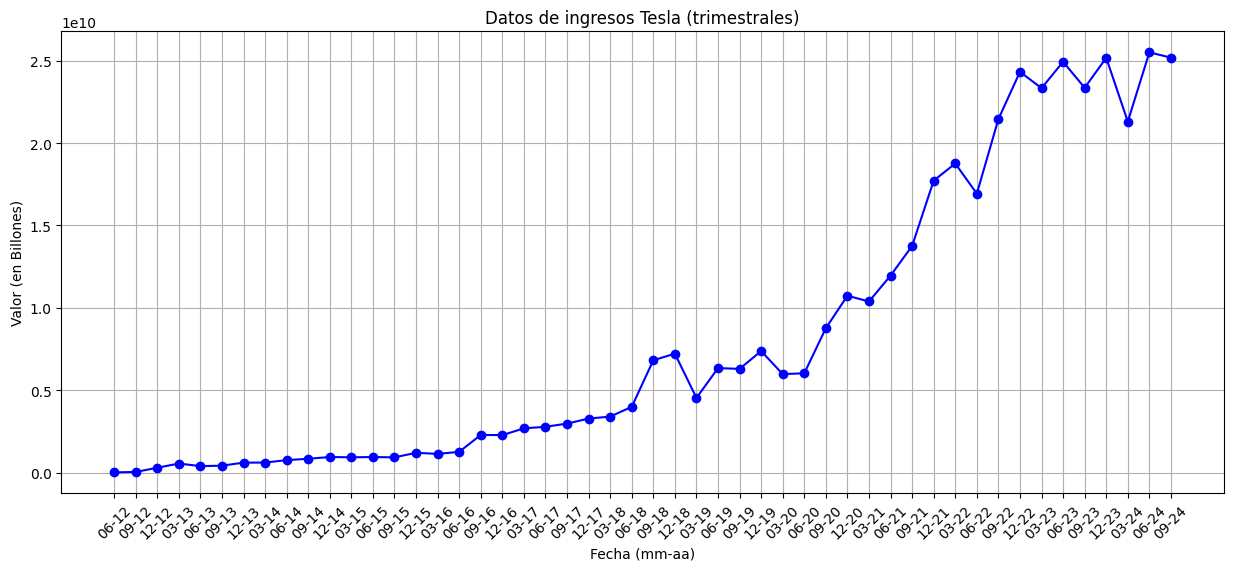

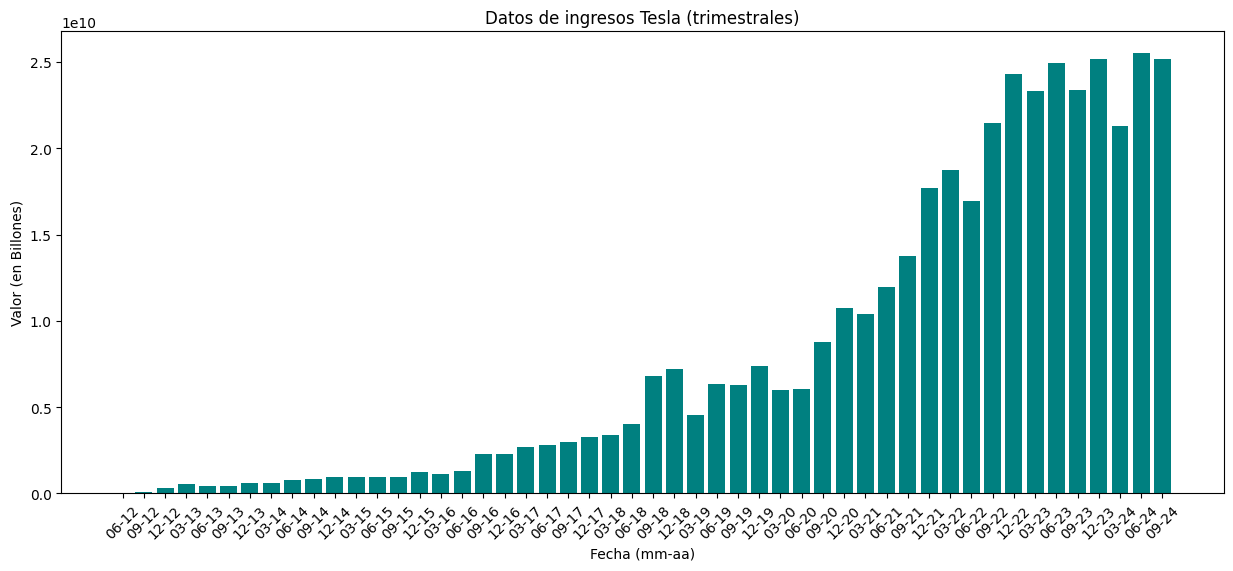

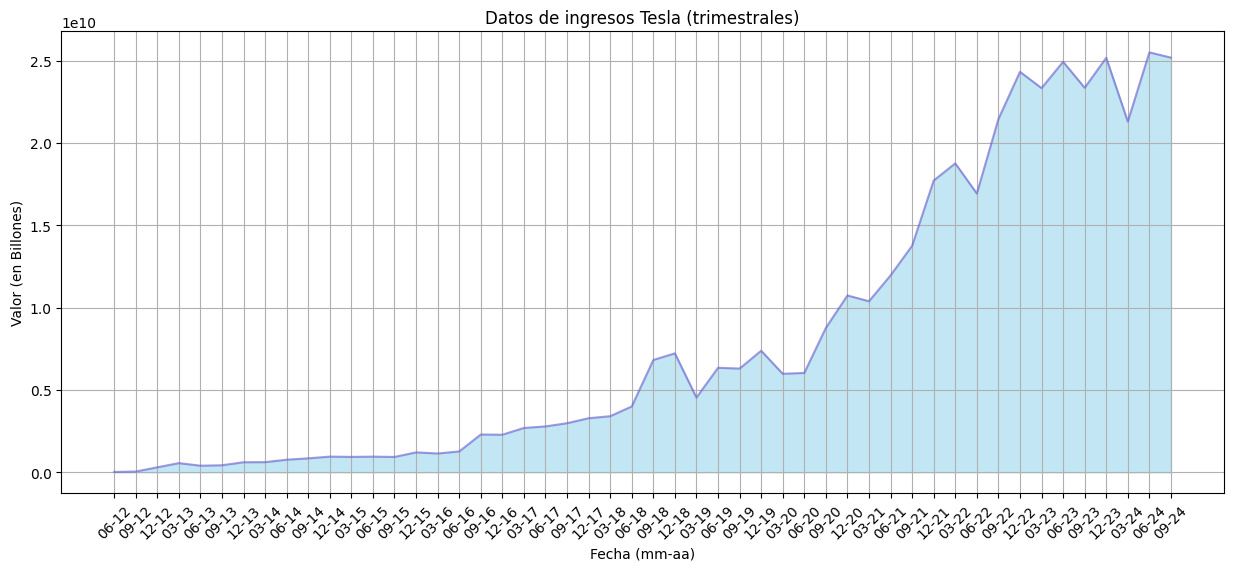

In [42]:
# Gráfico de líneas
plt.figure(figsize=(15, 6))
plt.plot(df_invertido["Date"], df_invertido["Value"], marker="o", color="b", linestyle="-")
plt.title("Datos de ingresos Tesla (trimestrales)")
plt.xlabel("Fecha (mm-aa)")
plt.ylabel("Valor (en Billones)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(df_invertido["Date"], df_invertido["Value"], color="teal")
plt.title("Datos de ingresos Tesla (trimestrales)")
plt.xlabel("Fecha (mm-aa)")
plt.ylabel("Valor (en Billones)")
plt.xticks(rotation=45)
plt.show()

#Gráfico de áreas
plt.figure(figsize=(15, 6))
plt.fill_between(df_invertido["Date"], df_invertido["Value"], color="skyblue", alpha=0.5)
plt.plot(df_invertido["Date"], df_invertido["Value"], color="Slateblue", alpha=0.6)
plt.title("Datos de ingresos Tesla (trimestrales)")
plt.xlabel("Fecha (mm-aa)")
plt.ylabel("Valor (en Billones)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Podemos observar que los ingresos históricos de Tesla fueron generalmente en aumento desde el año 2012, con algunos altibajos en ciertos trimestres. Se observa una baja significativa de ingreso en marzo de 2024, llegando a un valor similar al que se tuvo en septiembre de 2022, pero repuntando dichos ingresos en el siguiente trimestre.